### **Import Libraries**

In [43]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

from xgboost import XGBRegressor


#### **Load Data & Basic Info**

In [44]:
# Load CSV
df = pd.read_csv(r"C:\Users\Admin\DSA3020-VA-Capstone-Project\DATA\raw\kamis_maize_prices.csv")

# Basic overview
print(df.head())




  Commodity_Classification  Commodity Classification   County  \
0          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
1          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
2          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
3          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   
4          Dry_White_Maize  Dry_Maize    White_Maize  Baringo   

            Market       Date  Year  Month Year_Month  WeekofYear Year_Week  \
0   Marigat_Market  5/24/2021  2021      5    2021-05          21   2021-21   
1  Kabarnet_Market  5/24/2021  2021      5    2021-05          21   2021-21   
2  Kabarnet_Market  5/24/2021  2021      5    2021-05          21   2021-21   
3   Marigat_Market  5/24/2021  2021      5    2021-05          21   2021-21   
4   Marigat_Market  5/24/2021  2021      5    2021-05          21   2021-21   

   SupplyVolume  Retail  Wholesale Unit  
0       14000.0    30.0      27.00   Kg  
1        2000.0    40.0      22.22   Kg  
2       

#### **Data information and description**

In [45]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21888 entries, 0 to 21887
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Commodity_Classification  21888 non-null  object 
 1   Commodity                 21888 non-null  object 
 2   Classification            21888 non-null  object 
 3   County                    21888 non-null  object 
 4   Market                    21888 non-null  object 
 5   Date                      21888 non-null  object 
 6   Year                      21888 non-null  int64  
 7   Month                     21888 non-null  int64  
 8   Year_Month                21888 non-null  object 
 9   WeekofYear                21888 non-null  int64  
 10  Year_Week                 21888 non-null  object 
 11  SupplyVolume              17383 non-null  float64
 12  Retail                    21016 non-null  float64
 13  Wholesale                 20202 non-null  float64
 14  Unit  

##### **Convert Dates**

In [46]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekofYear'] = df['Date'].dt.isocalendar().week


In [47]:
print(df.describe())

                                Date          Year         Month  WeekofYear  \
count                          21888  21888.000000  21888.000000     21888.0   
mean   2022-11-12 09:07:06.315789568   2022.362482      6.536230   26.628609   
min              2021-05-24 00:00:00   2021.000000      1.000000         1.0   
25%              2021-12-29 00:00:00   2021.000000      4.000000        17.0   
50%              2022-10-09 00:00:00   2022.000000      6.000000        26.0   
75%              2023-07-12 00:00:00   2023.000000      9.000000        38.0   
max              2025-07-31 00:00:00   2025.000000     12.000000        52.0   
std                              NaN      1.088241      3.123253    13.47537   

       SupplyVolume        Retail     Wholesale  
count  1.738300e+04  21016.000000  20202.000000  
mean   2.658814e+04     62.197396     50.884952  
min    0.000000e+00      6.390000      0.020000  
25%    1.620000e+03     40.000000     34.440000  
50%    4.600000e+03     60.00

#### **Handling Missing Values**

In [48]:
for col in df.columns:
    missing_pct = (df[col].isnull().sum() / df.shape[0]) * 100
    print(f"{col}: {missing_pct:.2f}% missing")
df = df[df["Retail"].notna()]



Commodity_Classification: 0.00% missing
Commodity: 0.00% missing
Classification: 0.00% missing
County: 0.00% missing
Market: 0.00% missing
Date: 0.00% missing
Year: 0.00% missing
Month: 0.00% missing
Year_Month: 0.00% missing
WeekofYear: 0.00% missing
Year_Week: 0.00% missing
SupplyVolume: 20.58% missing
Retail: 3.98% missing
Wholesale: 7.70% missing
Unit: 0.00% missing


In [49]:
# 1. Remove rows with missing target
df = df[df["Retail"].notna()]
# 2. Fill SupplyVolume
df["SupplyVolume"] = df["SupplyVolume"].fillna(df["SupplyVolume"].median())
df["Wholesale"] = df["Wholesale"].fillna(df["Wholesale"].median())



In [50]:
for col in df.columns:
    missing_pct = (df[col].isnull().sum() / df.shape[0]) * 100
    print(f"{col}: {missing_pct:.2f}% missing")
df = df[df["Retail"].notna()]

Commodity_Classification: 0.00% missing
Commodity: 0.00% missing
Classification: 0.00% missing
County: 0.00% missing
Market: 0.00% missing
Date: 0.00% missing
Year: 0.00% missing
Month: 0.00% missing
Year_Month: 0.00% missing
WeekofYear: 0.00% missing
Year_Week: 0.00% missing
SupplyVolume: 0.00% missing
Retail: 0.00% missing
Wholesale: 0.00% missing
Unit: 0.00% missing


##### **Categorical Exploration**

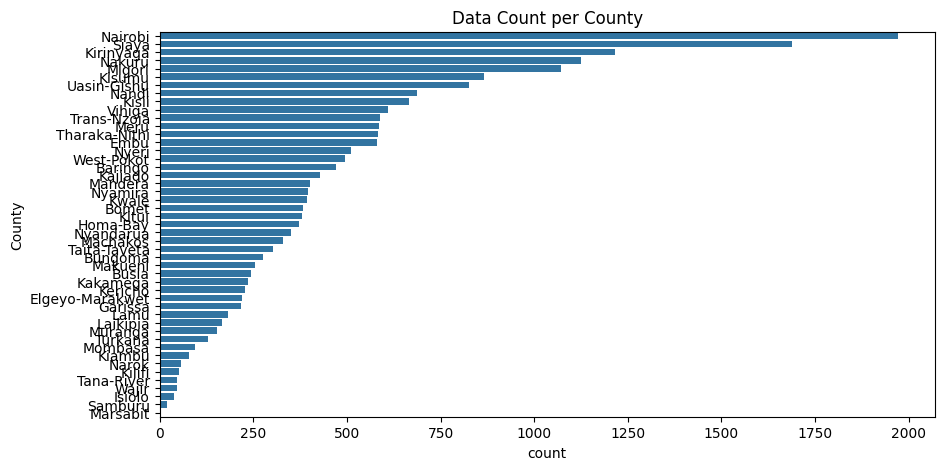

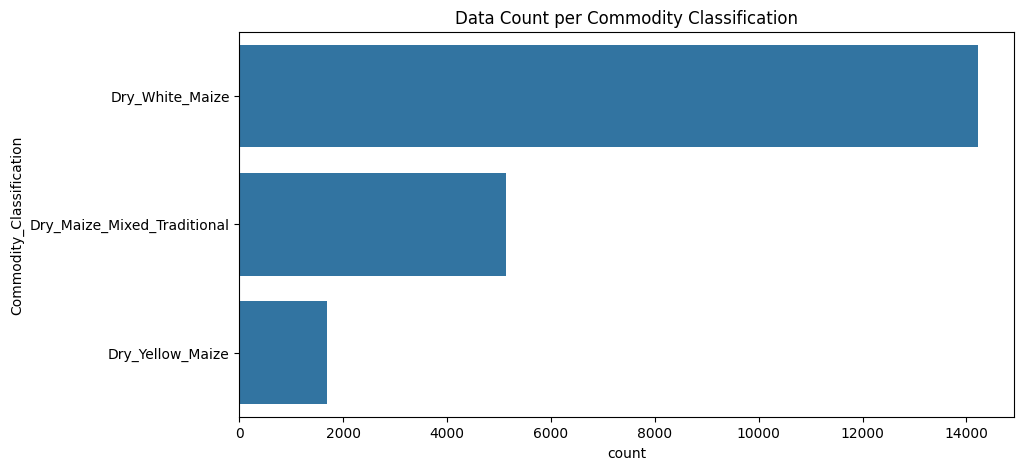

In [51]:
# Count plots
plt.figure(figsize=(10,5))
sns.countplot(y='County', data=df, order=df['County'].value_counts().index)
plt.title("Data Count per County")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(y='Commodity_Classification', data=df)
plt.title("Data Count per Commodity Classification")
plt.show()


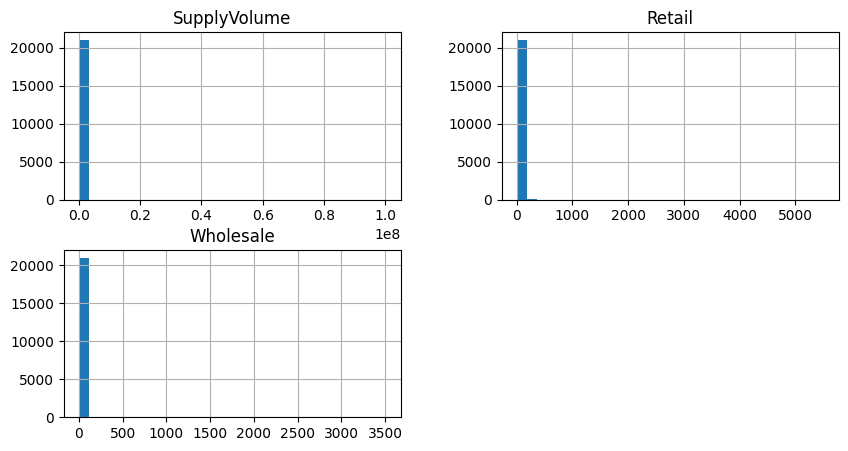

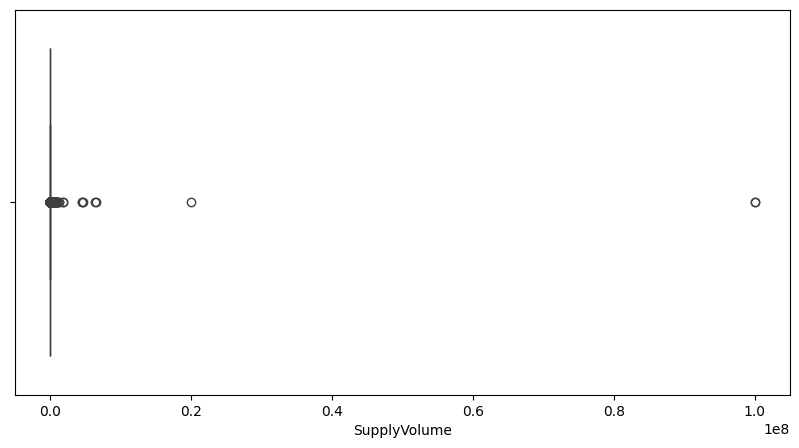

In [52]:
# Histograms
df[['SupplyVolume', 'Retail', 'Wholesale']].hist(bins=30, figsize=(10,5))
plt.show()

# Boxplots for outliers
plt.figure(figsize=(10,5))
sns.boxplot(x='SupplyVolume', data=df)
plt.show()


<Axes: xlabel='Classification', ylabel='count'>

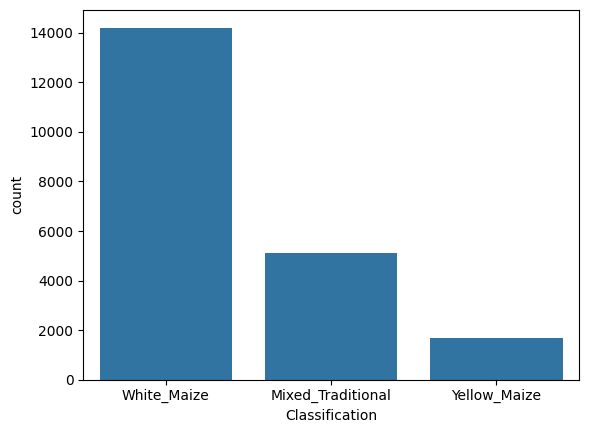

In [53]:

sns.countplot(x=df["Classification"])

In [ ]:
sns.histplot(df["Retail"])

<Axes: title={'center': 'Distribution of Retial'}>

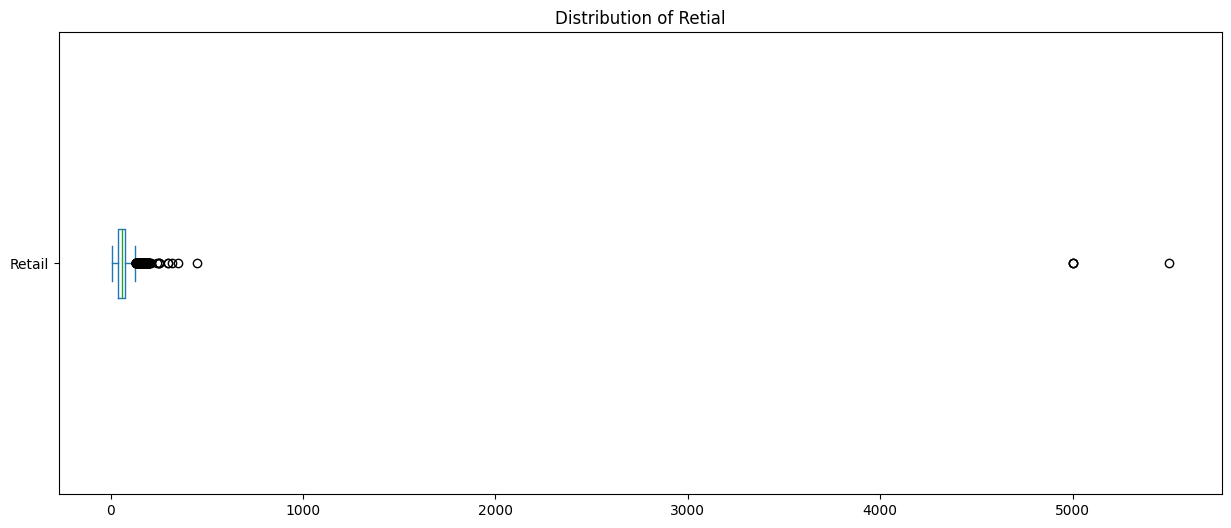

In [ ]:
fig, ax=plt.subplots(figsize=(15,6))
df["Retail"].plot(kind="box",vert=False, title="Distribution of Retial",ax=ax)

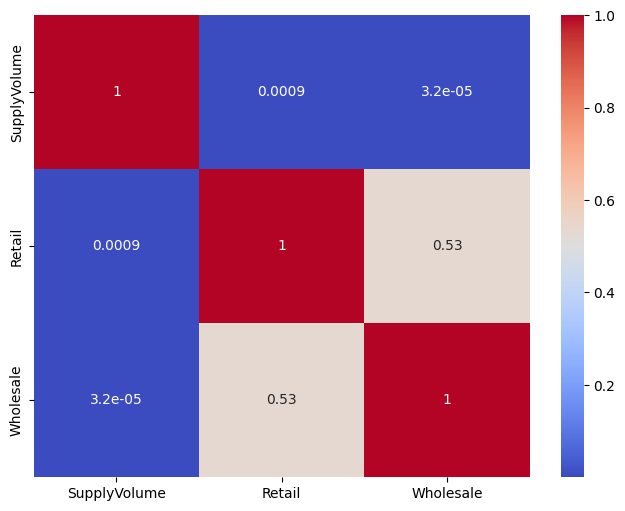

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['SupplyVolume', 'Retail', 'Wholesale']].corr(), annot=True, cmap='coolwarm')
plt.show()


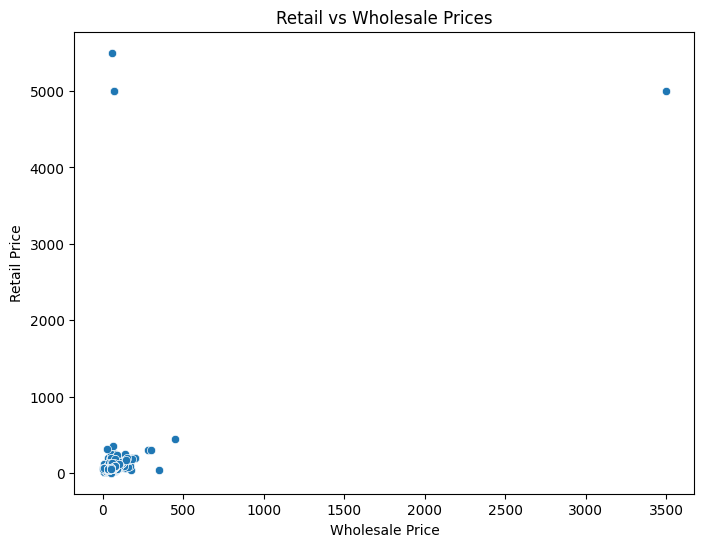

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Wholesale', y='Retail', data=df)
plt.title('Retail vs Wholesale Prices')
plt.xlabel('Wholesale Price')
plt.ylabel('Retail Price')
plt.show()


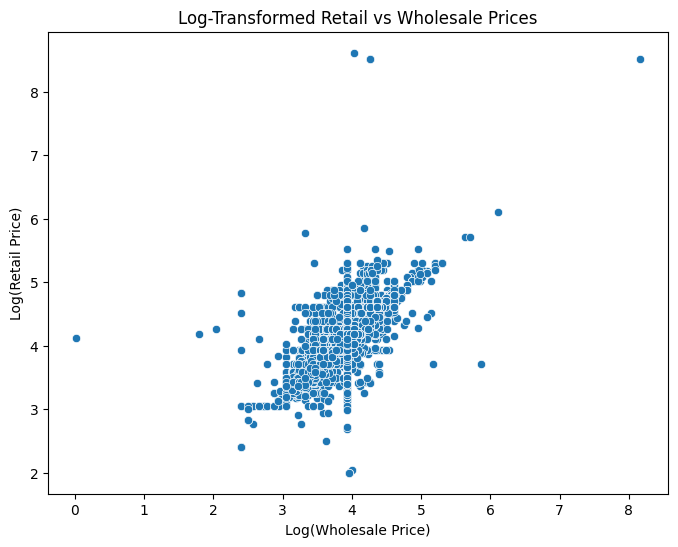

In [ ]:

# Apply log transformation (add small constant to avoid log(0))
df['Wholesale_log'] = np.log1p(df['Wholesale'])
df['Retail_log'] = np.log1p(df['Retail'])

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Wholesale_log', y='Retail_log', data=df)
plt.title('Log-Transformed Retail vs Wholesale Prices')
plt.xlabel('Log(Wholesale Price)')
plt.ylabel('Log(Retail Price)')
plt.show()


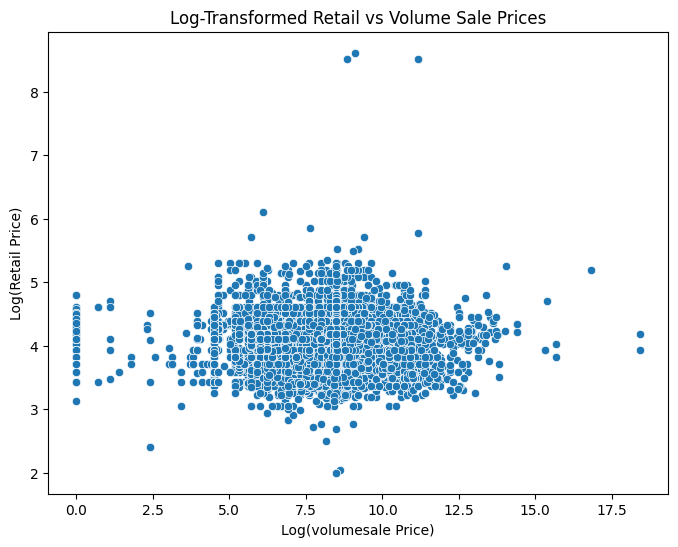

In [ ]:
# Apply log transformation (add small constant to avoid log(0))
df['volumesale_log'] = np.log1p(df["SupplyVolume"])

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='volumesale_log', y='Retail_log', data=df)
plt.title('Log-Transformed Retail vs Volume Sale Prices')
plt.xlabel('Log(volumesale Price)')
plt.ylabel('Log(Retail Price)')
plt.show()

In [ ]:
print(df[["Retail_log","Wholesale_log"]].corr())

               Retail_log  Wholesale_log
Retail_log       1.000000       0.844037
Wholesale_log    0.844037       1.000000


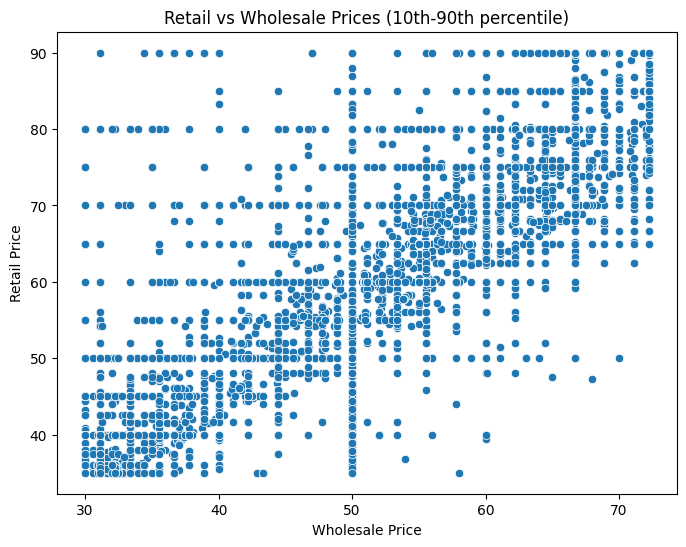

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute 10th and 90th percentiles
lower_wholesale = df['Wholesale'].quantile(0.1)
upper_wholesale = df['Wholesale'].quantile(0.9)

lower_retail = df['Retail'].quantile(0.1)
upper_retail = df['Retail'].quantile(0.9)

# Filter data between 0.1 and 0.9 quantiles
df_filtered = df[
    (df['Wholesale'] >= lower_wholesale) & (df['Wholesale'] <= upper_wholesale) &
    (df['Retail'] >= lower_retail) & (df['Retail'] <= upper_retail)
]

# Plot scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x='Wholesale', y='Retail', data=df_filtered)
plt.title('Retail vs Wholesale Prices (10th-90th percentile)')
plt.xlabel('Wholesale Price')
plt.ylabel('Retail Price')
plt.show()


##### **Box-Cox Transformation**

##### **Quantile Transformation / Rank-Based Scaling**

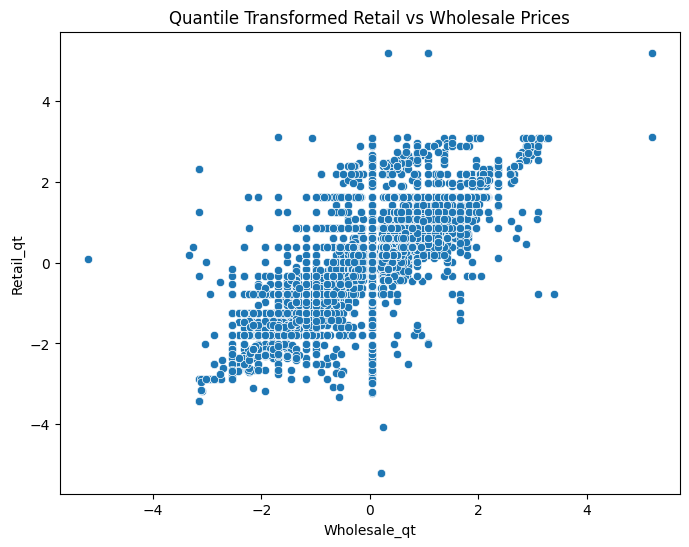

In [ ]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')
df[['Wholesale_qt', 'Retail_qt']] = qt.fit_transform(df[['Wholesale', 'Retail']])

plt.figure(figsize=(8,6))
sns.scatterplot(x='Wholesale_qt', y='Retail_qt', data=df)
plt.title('Quantile Transformed Retail vs Wholesale Prices')
plt.show()


In [ ]:
print(df[['Wholesale_qt', 'Retail_qt']].corr())

              Wholesale_qt  Retail_qt
Wholesale_qt       1.00000    0.84142
Retail_qt          0.84142    1.00000


##### **Time Series Insights**

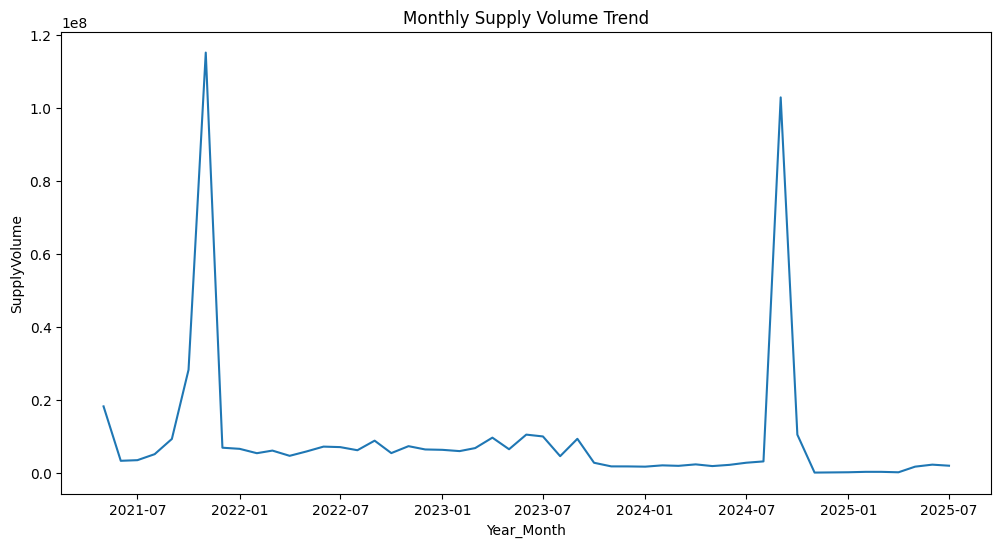

In [ ]:
# Monthly SupplyVolume trend
monthly = df.groupby('Year_Month')['SupplyVolume'].sum().reset_index()
monthly['Year_Month'] = pd.to_datetime(monthly['Year_Month'])
plt.figure(figsize=(12,6))
sns.lineplot(x='Year_Month', y='SupplyVolume', data=monthly)
plt.title("Monthly Supply Volume Trend")
plt.show()


In [ ]:
# Monthly SupplyVolume trend
monthly = df.groupby('Year_Month')['Retail_log'].sum().reset_index()
monthly['Year_Month'] = pd.to_datetime(monthly['Year_Month'])
plt.figure(figsize=(12,6))
sns.lineplot(x='Year_Month', y='SupplyVolume', data=monthly)
plt.title("Monthly Supply Volume Trend")
plt.show()


KeyError: 'Column not found: Retail_log'

#### **Data cleaning** 

In [ ]:
df.shape

(21016, 20)

#### **Encoding Strategies**

In [ ]:
print(df.value_counts())

Commodity_Classification     Commodity  Classification     County       Market                  Date        Year  Month  Year_Month  WeekofYear  Year_Week  SupplyVolume  Retail  Wholesale  Unit  Wholesale_log  Retail_log  volumesale_log  Wholesale_qt  Retail_qt
Dry_White_Maize              Dry_Maize  White_Maize        Nairobi      Gikomba_Market          2021-05-24  2021  5      2021-05     21          2021-21    4800.0        50.0    50.00      Kg    3.931826       3.931826    8.476580         0.033880     -0.320290    30
Dry_Yellow_Maize             Dry_Maize  Yellow_Maize       Nyamira      Miruka_Market           2024-10-09  2024  10     2024-10     41          2024-40    450.0         50.0    50.00      Kg    3.931826       3.931826    6.111467         0.033880     -0.320290    25
                                                           Nakuru       Nakuru_Wakulima_Market  2021-05-24  2021  5      2021-05     21          2021-21    4800.0        44.0    33.33      Kg    3.53602

##### **Mean Encoding**

In [ ]:
mean_prices = df.groupby('County')['Wholesale'].mean()
df['County_encoded'] = df['County'].map(mean_prices)


##### **Label Encoding**


In [ ]:
le = LabelEncoder()
df['Market_encoded'] = le.fit_transform(df['Market'])


In [ ]:
# Combine columns
df['Commodity_Classification'] = df['Commodity'] + "_" + df['Classification']
le = LabelEncoder()
df['Commodity_Classification_encoded'] = le.fit_transform(df['Commodity_Classification'])


In [ ]:
df.head()

,Commodity_Classification,Commodity,Classification,County,Market,Date,Year,Month,Year_Month,WeekofYear,...,Wholesale,Unit,Wholesale_log,Retail_log,volumesale_log,Wholesale_qt,Retail_qt,County_encoded,Market_encoded,Commodity_Classification_encoded
0,Dry_Maize_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,2021-05-24,2021,5,2021-05,21,...,27.00,Kg,3.332205,3.433987,9.546884,-1.606755,-1.798663,46.935957,140,1
1,Dry_Maize_White_Maize,Dry_Maize,White_Maize,Baringo,Kabarnet_Market,2021-05-24,2021,5,2021-05,21,...,22.22,Kg,3.145014,3.713572,7.601402,-2.325972,-0.776528,46.935957,57,1
2,Dry_Maize_White_Maize,Dry_Maize,White_Maize,Baringo,Kabarnet_Market,2021-05-24,2021,5,2021-05,21,...,25.00,Kg,3.258097,3.433987,7.901377,-1.926403,-1.798663,46.935957,57,1
3,Dry_Maize_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,2021-05-24,2021,5,2021-05,21,...,27.00,Kg,3.332205,3.433987,9.546884,-1.606755,-1.798663,46.935957,140,1
4,Dry_Maize_White_Maize,Dry_Maize,White_Maize,Baringo,Marigat_Market,2021-05-24,2021,5,2021-05,21,...,27.00,Kg,3.332205,3.433987,9.546884,-1.606755,-1.798663,46.935957,140,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21016 entries, 0 to 21887
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Commodity_Classification          21016 non-null  object        
 1   Commodity                         21016 non-null  object        
 2   Classification                    21016 non-null  object        
 3   County                            21016 non-null  object        
 4   Market                            21016 non-null  object        
 5   Date                              21016 non-null  datetime64[ns]
 6   Year                              21016 non-null  int32         
 7   Month                             21016 non-null  int32         
 8   Year_Month                        21016 non-null  object        
 9   WeekofYear                        21016 non-null  UInt32        
 10  Year_Week                         21016 non-null  o

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
df["Commodity_Classification"] = (
    df["Commodity"] + "_" + df["Classification"]
)

# Label encode County and Market
for col in ["County", "Market"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# One-hot encode Commodity_Classification
df = pd.get_dummies(df, columns=["Commodity_Classification"], drop_first=True)


In [ ]:
df.columns

Index(['Commodity', 'Classification', 'County', 'Market', 'Date', 'Year',
       'Month', 'Year_Month', 'WeekofYear', 'Year_Week', 'SupplyVolume',
       'Retail', 'Wholesale', 'Unit', 'Wholesale_log', 'Retail_log',
       'volumesale_log', 'Wholesale_qt', 'Retail_qt', 'County_encoded',
       'Market_encoded', 'Commodity_Classification_encoded',
       'Commodity_Classification_Dry_Maize_White_Maize',
       'Commodity_Classification_Dry_Maize_Yellow_Maize'],
      dtype='object')

#### **Split**

In [ ]:

X = df[["Commodity_Classification_encoded","County_encoded","Market_encoded","volumesale_log"]]
y = df["Retail_log"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### **Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, pred))
print("R²:", r2_score(y_test, pred))


MAE: 0.21862592714823204
R²: 0.3864217136099525


### **Feature Importance**

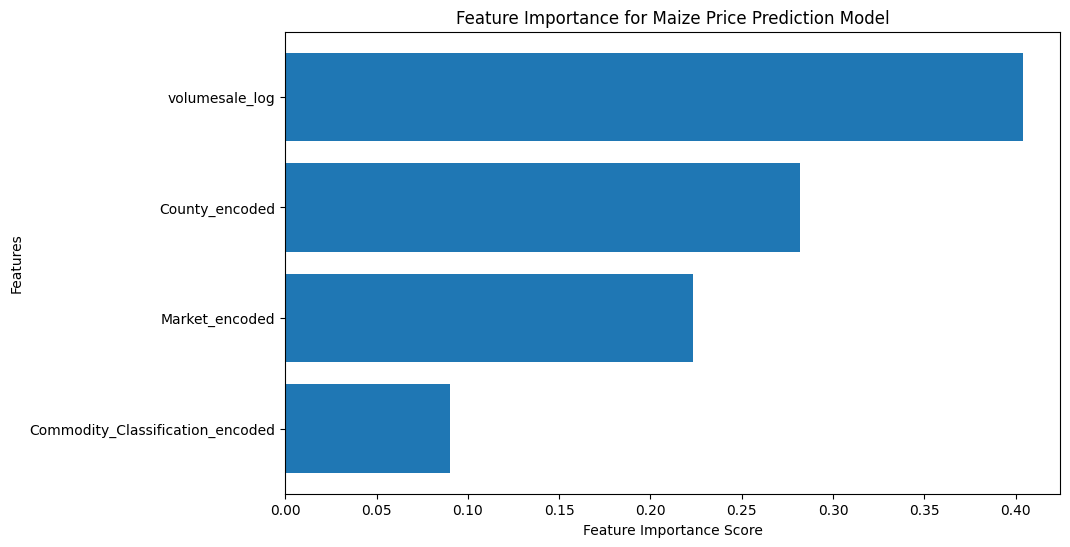

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances from your model
importances = model.feature_importances_
feature_names = X.columns

# Put into a DataFrame for easier handling
fi_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(fi_df["Feature"], fi_df["Importance"])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Maize Price Prediction Model")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=600,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8
)
model.fit(X_train, y_train)
pred = model.predict(X_test)


In [ ]:
print("MAE:", mean_absolute_error(y_test, pred))
print("R²:", r2_score(y_test, pred))


MAE: 0.2168592756460669
R²: 0.43337417088025443


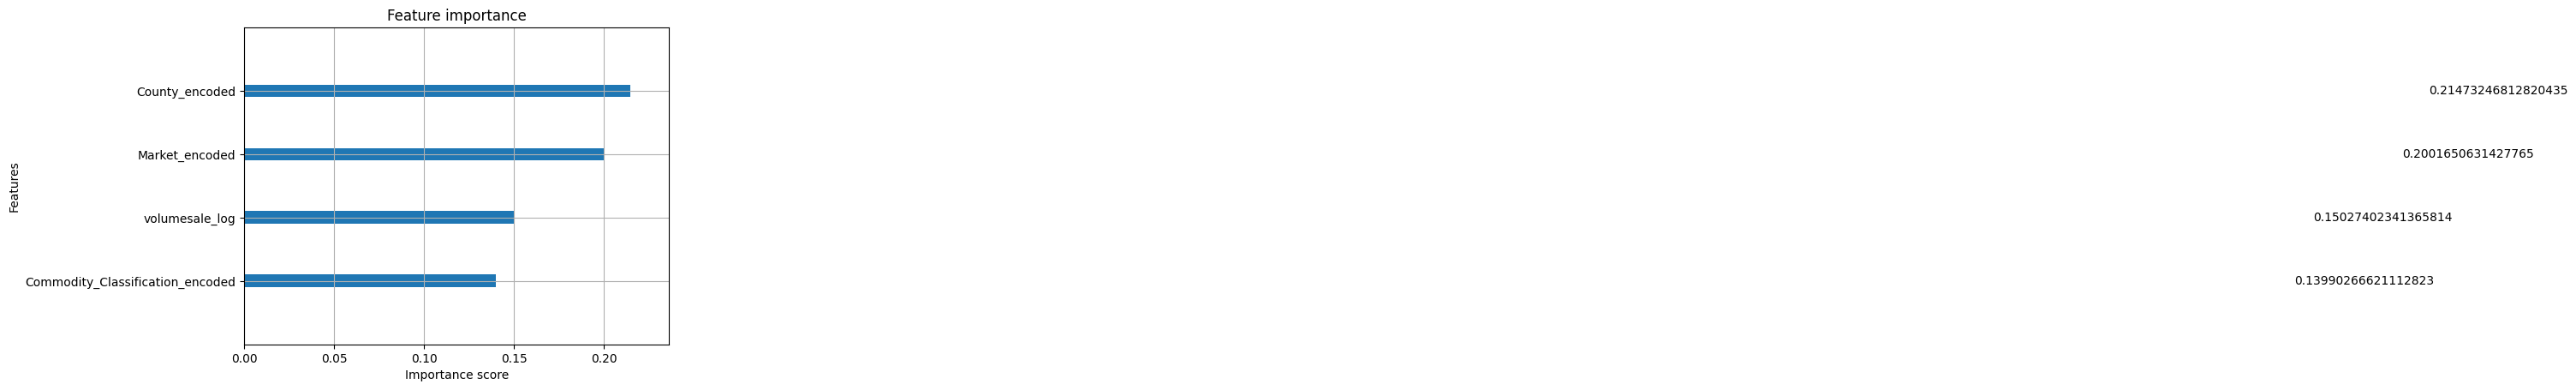

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model, max_num_features=15, importance_type='gain')
plt.show()
